In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = sns.load_dataset('planets')

In [3]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [5]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


# Data Cleaning

## There are multiple Null Values in the rows which we will fix one at a time.

In [6]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

> First we will deal with the Orbital Period column which has only 43 Null values. We can deal with this by taking the mean of the total column.

In [7]:
df['orbital_period'].mean()

2002.9175960947584

> we will now Fill this value into the column. 

In [8]:
df['orbital_period'].fillna(value = 2002.917, inplace=True)

In [9]:
df['orbital_period'].isna().sum()

0

> Next we will move on to the mass column which has <b>522</b> Null Entries. 

In [10]:
df['mass'].describe()

count    513.000000
mean       2.638161
std        3.818617
min        0.003600
25%        0.229000
50%        1.260000
75%        3.040000
max       25.000000
Name: mass, dtype: float64

We can try visualizing The planet number against the mass and try to find a mean value of mass against the planet which we can imppute into the missing entries.

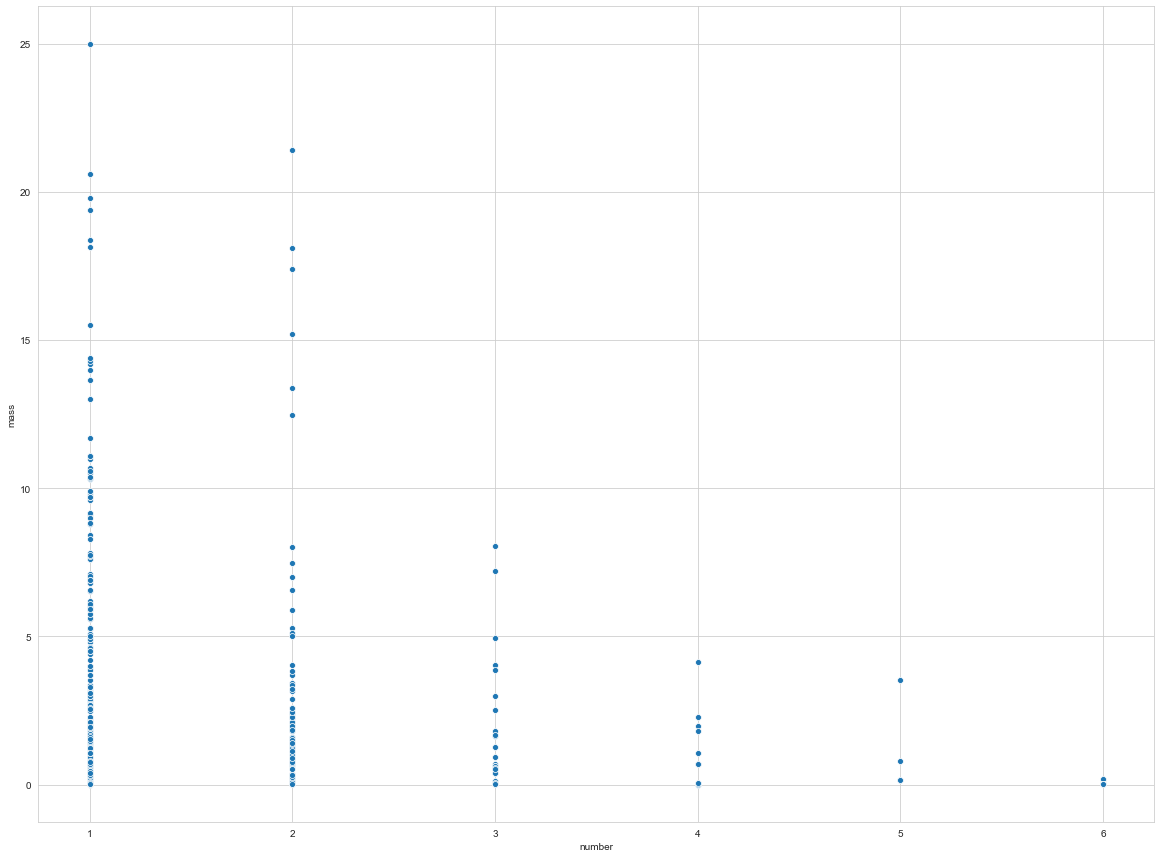

In [11]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='number', y='mass', data=df)

With this visualization it seems the mass of the planet changes with the number of the planet. We can infer that the planets that belong to the number 1 have a mass whic goes upto 25.
> we can now use this to create a function which gives a random entry within the range of the min and max value of the corresponding number as mentioned below<br>
<ul>
<li>Planet 1 = 0 to 25</li>
    <li>Planet 2 = 0 to 22</li>
    <li>Planet 3 = 0 to 8</li>
    <li>Planet 4 = 0 to 4</li>
    <li>Planet 5 = 0 to 3</li>
    <li>Planet 6 = 0 to 1</li>
</ul>

In [12]:
import random
def impute_mass(cols):
    mass = cols[0]
    number = cols[1]
    if pd.isnull(mass):
        if number == 1:
            return random.randrange(25)
        elif number == 2:
            return random.randrange(22)
        elif number == 3:
            return random.randrange(8)
        elif number == 4:
            return random.randrange(4)
        elif number == 5:
            return random.randrange(3)
        else:
            return random.randrange(1)
    else:
        return mass

In [13]:
#Imputed random values within a range that was found with the EDA on Mass based on Planet Number
df['mass'] = df[['mass', 'number']].apply(impute_mass, axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    1035 non-null float64
mass              1035 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


We can see that  Distance is the only column that we have null values in.
We will try to visualise the relationship between the column "distance" with the other ones.

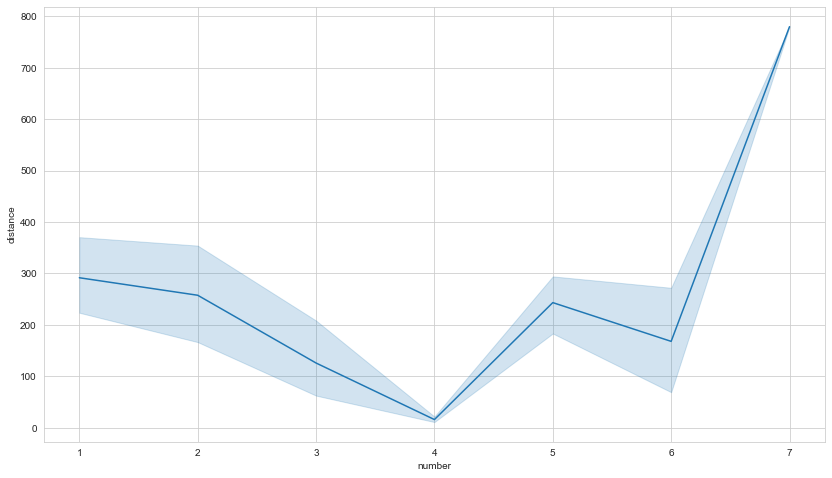

In [15]:
#Lets try to see if distance has any relation to the Planet Number provided in the Data.
plt.figure(figsize=(14,8))
sns.lineplot(x='number', y='distance', data=df)

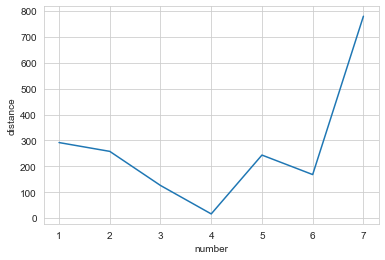

In [16]:
df_distance_cal = df.groupby(by='number', as_index = None).mean()
df_distance_cal
sns.lineplot(x='number', y='distance', data=df_distance_cal)

From the plot above we can make define the mean of the distance relative to the planet number. which we can use for the <b>NULL</b> Values.<br>
<ul>
<li>Planet 1 : 291.74</li>
<li>Planet 2: 257.69</li>
<li>Planet 3: 125.90</li>
<li>Planet 4: 15.93</li>
<li>Planet 5: 243.38</li>
<li>Planet 6: 168.00</li>
<li>Planet 7: 780.00</li>
</ul>

In [17]:
#Now we can create a function to impute the defined distance into the Dataframe.
def impute_distance(cols):
    number = cols[0]
    distance = cols[1]
    if pd.isnull(distance):
        if number == 1:
            return 291.74
        elif number == 2:
            return 257.69
        elif number == 3:
            return 125.90
        elif number == 4:
            return 15.93
        elif number == 5:
            return 243.38
        elif number == 6:
            return 168.0
        else:
            return 780.0
    else:
        return distance

In [18]:
df['distance'] = df[['number', 'distance']].apply(impute_distance, axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    1035 non-null float64
mass              1035 non-null float64
distance          1035 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


<b>Now we have filled all the 'Null' values in the entire dataframe.</b><br>
We can now move towards EDA and then create a ML Model that can predict the planet number.

# EDA (Exploratory Data Analysis)

We will try to see the relationship between the Columns and try to plot the relationships using Matplotlib or Seaborn (Just as an exercise)

In [20]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [21]:
df['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

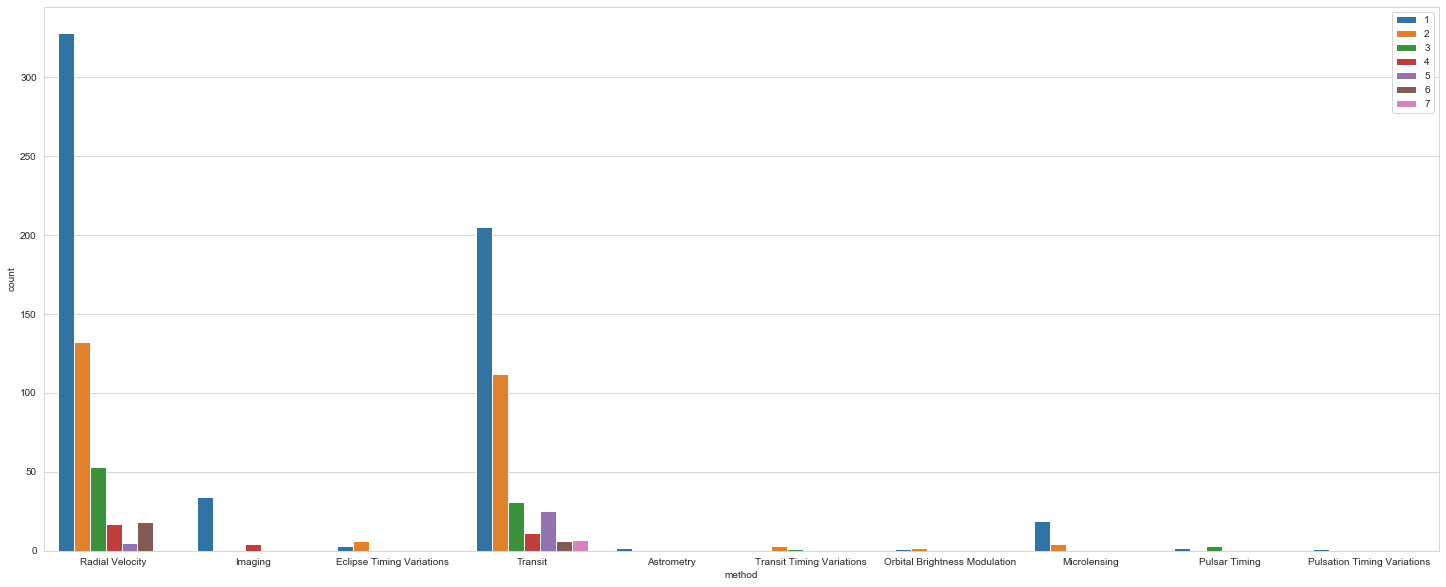

In [22]:
# We will plot a count of the methods used to discover the Planet based on the Planet Number.
plt.figure(figsize=(25,10))
sns.countplot(x='method', data=df, hue='number')
plt.legend(loc='upper right')

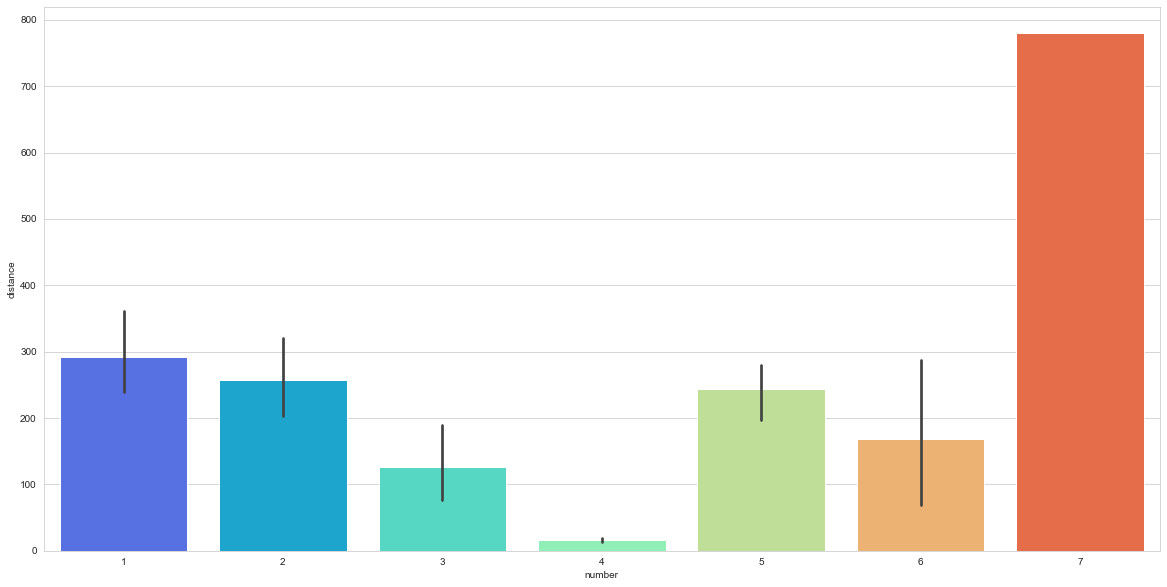

In [49]:
#We will try to visualize the relation between mass and distance.
plt.figure(figsize=(20,10))
sns.barplot(x='number', y='distance', data=df, palette='rainbow')